In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import pickle
import nibabel as nib
from monai.apps import DecathlonDataset
from sklearn.model_selection import train_test_split
from fastMONAI.vision_all import *
from PIL import Image 
import PIL 
import numpy as np 
import numpy.ma as ma
import matplotlib.pyplot as plt
import cv2


In [ ]:
top = nib.load('../data/external/IXI-T1/IXI012-HH-1211-T1.nii.gz')
top2 = nib.load('../data/external/IXI-T1/IXI013-HH-1212-T1.nii.gz')
top3 = nib.load('../data/external/IXI-T1/IXI016-Guys-0697-T1.nii.gz')
side = nib.load('../data/external/IXI-T2/IXI012-HH-1211-T2.nii.gz')
DTI = nib.load('../data/external/IXI-DTI/IXI012-HH-1211-DTI-00.nii.gz')
MRA = nib.load('../data/external/IXI-MRA/IXI012-HH-1211-MRA.nii.gz') 
PD = nib.load('../data/external/IXI-PD/IXI012-HH-1211-PD.nii.gz')
top.shape

(256, 256, 150)

In [ ]:
path = Path('../data/processed/IXI_2d_slices/')
fnames = get_image_files(path / "Axial")
masks = get_image_files(path / "AxialMask")

<AxesSubplot:>

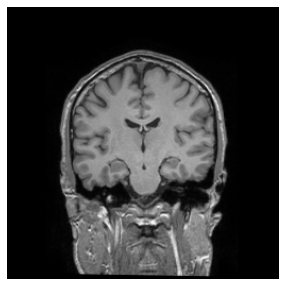

In [ ]:
img_fn = fnames[5]
img = PILImage.create(img_fn)
img.show(figsize=(5,5))

<AxesSubplot:>

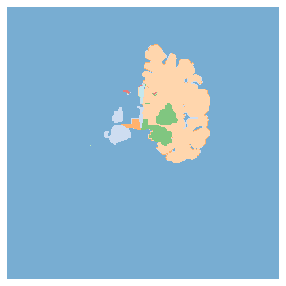

In [ ]:
msk = PILMask.create(lbl_names[5])
msk.show(figsize=(5,5), alpha=0.6)

<AxesSubplot:>

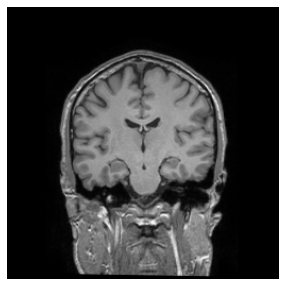

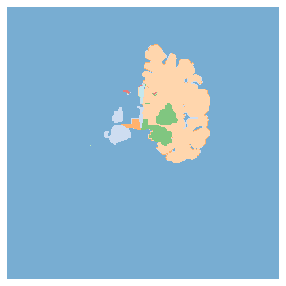

In [ ]:
#img.show(figsize=(5,5))
#msk.show(figsize=(5,5), alpha=0.6)
plt.imshow(image, cmap='gray') 

In [ ]:
codes = np.loadtxt(path/'code-kopi_kuttet.txt', dtype=str)
codes

array([['0', 'Unknown', '0', '0', '0', '0\\'],
       ['1', 'Left-Cerebral-Exterior', '70', '130', '180', '0\\'],
       ['2', 'Left-Cerebral-White-Matter', '245', '245', '245', '0\\'],
       ...,
       ['702', 'GrayMatter-FSL-FAST', '205', '62', '78', '0\\'],
       ['703', 'WhiteMatter-FSL-FAST', '0', '225', '0', '0\\'],
       ['999', 'SUSPICIOUS', '255', '100', '100', '0\\']], dtype='<U39')

In [ ]:
get_msk = lambda o: path/'AxialMask'/f'{o.stem}-mask{o.suffix}'

In [ ]:
def label_func(fn): return path/"labels"/f"{fn.stem}_P{fn.suffix}"

In [ ]:
(path/"Axial").ls()[0]

Path('../data/processed/IXI_2d_slices/Axial/IXI480-Guys-1033-2d_axial.png')

In [ ]:
dls = SegmentationDataLoaders.from_label_func(
     path, bs=8, fnames = fnames, label_func = get_msk, codes = codes
)

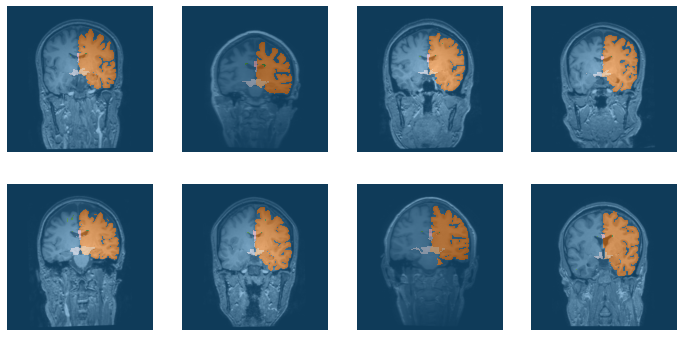

In [ ]:
dls.show_batch(max_n=8)

In [ ]:
learn = unet_learner(dls, resnet34)

learn.fine_tune(1)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,time
0,0.677233,0.290974,30:18


epoch,train_loss,valid_loss,time


KeyboardInterrupt: 

In [ ]:
learn.show_results(max_n=1, figsize=(7,8))

IndexError: Target 12 is out of bounds.

In [ ]:
camvid = DataBlock(blocks=(ImageBlock, MaskBlock(codes)),
                   get_items=get_image_files,
                   splitter=RandomSplitter(),
                   get_y=get_msk,
                   #batch_tfms=[*aug_transforms(size='half'), Normalize.from_stats(*imagenet_stats)]
                   )

In [ ]:
dls = camvid.dataloaders(Path('../data/processed/IXI_2d_slices/Axial'), bs=16)

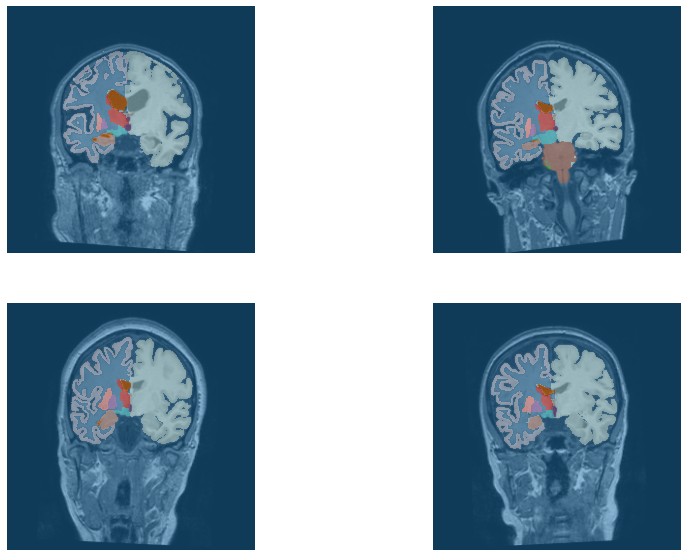

In [ ]:
dls.show_batch(max_n=4, vmin=1, vmax=30, figsize=(14,10))

In [ ]:
dls.vocab = codes

In [ ]:
name2id = {v:k for k,v in enumerate(codes)}

In [ ]:
name2id

{'Unknown': 0,
 'Left-Cerebral-Exterior': 1,
 'Left-Cerebral-White-Matter': 2,
 'Left-Cerebral-Cortex': 3,
 'Left-Lateral-Ventricle': 4,
 'Left-Inf-Lat-Vent': 5,
 'Left-Cerebellum-Exterior': 6,
 'Left-Cerebellum-White-Matter': 7,
 'Left-Cerebellum-Cortex': 8,
 'Left-Thalamus': 9,
 'Left-Thalamus-Proper*': 10,
 'Left-Caudate': 11,
 'Left-Putamen': 12,
 'Left-Pallidum': 13,
 'rd-Ventricle': 14,
 'th-Ventricle': 72,
 'Brain-Stem': 16,
 'Left-Hippocampus': 17,
 'Left-Amygdala': 18,
 'Left-Insula': 19,
 'Left-Operculum': 20,
 'Line-': 23,
 'CSF': 24,
 'Left-Lesion': 25,
 'Left-Accumbens-area': 26,
 'Left-Substancia-Nigra': 27,
 'Left-VentralDC': 28,
 'Left-undetermined': 29,
 'Left-vessel': 30,
 'Left-choroid-plexus': 31,
 'Left-Forb': 32,
 'Left-lOg': 33,
 'Left-aOg': 34,
 'Left-mOg': 35,
 'Left-pOg': 36,
 'Left-Stellate': 37,
 'Left-Porg': 38,
 'Left-Aorg': 39,
 'Right-Cerebral-Exterior': 40,
 'Right-Cerebral-White-Matter': 41,
 'Right-Cerebral-Cortex': 42,
 'Right-Lateral-Ventricle': 43,

In [ ]:
void_code = name2id['Unknown']

In [ ]:
def acc_camvid(inp, targ):
  targ = targ.squeeze(1)
  mask = targ != void_code
  return (inp.argmax(dim=1)[mask]==targ[mask]).float().mean()

In [ ]:
opt = ranger

In [ ]:
learn = unet_learner(dls, resnet34, metrics=acc_camvid, self_attention=True, act_cls=Mish, opt_func=opt)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
learn.summary()

DynamicUnet (Input shape: 16 x 3 x 256 x 256)
Layer (type)         Output Shape         Param #    Trainable 
                     16 x 64 x 128 x 128 
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     16 x 64 x 64 x 64   
MaxPool2d                                                      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                     

In [ ]:
learn.lr_find()

IndexError: Target 252 is out of bounds.

In [ ]:
lr = 1e-3

In [ ]:
learn.fit_flat_cos(10, slice(lr))

In [ ]:
learn.save('stage-1')
learn.load('stage-1')

In [ ]:
learn.show_results(max_n=4, figsize=(12,6))

IndexError: Target 252 is out of bounds.

In [ ]:
image = cv2.imread('../data/processed/IXI_2d_slices/Axial/IXI002-Guys-0828-2d_axial.png')
image_mask = cv2.imread('../data/processed/IXI_2d_slices/AxialMask/IXI002-Guys-0828-2d_axial-mask.png')


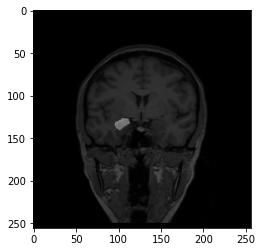

In [ ]:
#18, 18 ,18 Left Hippocampus

lower = np.array([17,17,17])
upper = np.array([19,19,19])

Hippocampus = cv2.inRange(image_mask, lower, upper)

masked = cv2.bitwise_and(image,image, mask=Hippocampus)

result = image - masked

#mask
#plt.imshow(result, alpha=1)
plt.imshow(image, cmap='gray') # I would add interpolation='none'
plt.imshow(masked, cmap='jet', alpha=0.7) # interpolation='none'


In [ ]:
Load_test = nib.load('../data/external/T1/BRAINIX_DICOM_T1_IM-0001-0002.dcm')
temp = plt.imshow(Load_test.get_fdata()[:,128,:])
temp

ImageFileError: Cannot work out file type of "../data/external/T1/BRAINIX_DICOM_T1_IM-0001-0002.dcm"

In [ ]:
mappen = "../data/external/IXI-T1"
path = Path(mappen)
path.mkdir(exist_ok=True)

alle_filene = [f for f in os.listdir(path) if f.endswith(".gz")]

i = 0


for x in alle_filene:
    print(x)
    img = plt.imshow(nib.load(mappen + "/" + x).get_fdata()[:,128,:])
    bilde = Image.open(img)
    bilde = bilde.save("{}.png")
    i = i + 1
   

In [ ]:
img = top3.get_fdata()[:,128,:]

In [ ]:
bilde = plt.imshow(img)
bilde

In [ ]:
plt.imshow(img)

In [ ]:
plt.imshow(top.get_fdata()[:,120,:])

In [ ]:
plt.imshow(side.get_fdata()[:,100,:])

In [ ]:
plt.imshow(DTI.get_fdata()[:,90,:])

In [ ]:
plt.imshow(MRA.get_fdata()[:,100,:])

In [ ]:
plt.imshow(PD.get_fdata()[:,120,:])